### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


### 2. Load dataset

In [2]:
# Load the Iris dataset from sklearn
iris = datasets.load_iris()
# Convert the data into a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

### 3. EDA

In [4]:
# Exploratory Data Analysis (EDA)
print(iris_df.describe())  # Summary statistics
print(iris_df.head())      # View first few rows

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (

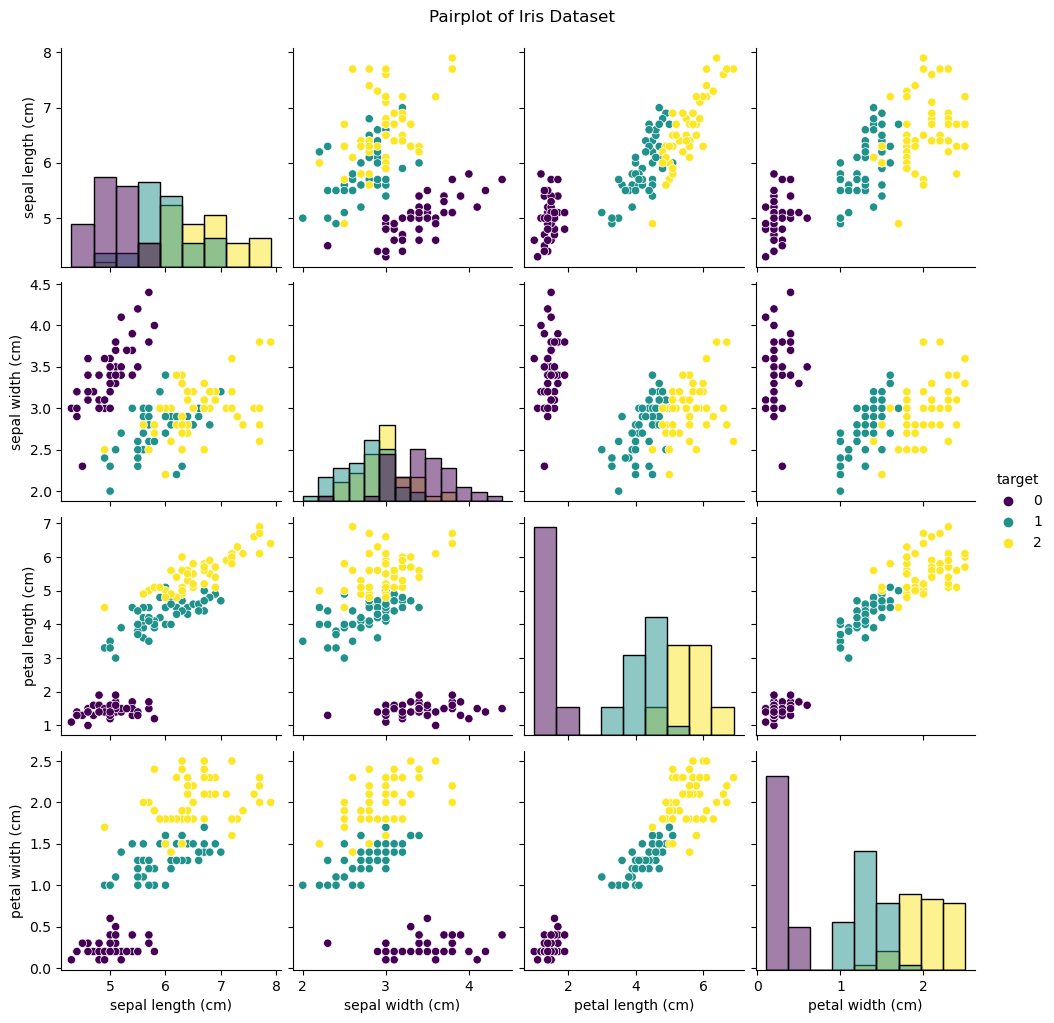

In [5]:
# Visualization (pairplot for all features)
import seaborn as sns
# EDA: Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='target', palette='viridis', diag_kind='hist')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

### 4.Split the data into features and target


In [6]:
# Separate features (X) and target (y) from the DataFrame
X = iris_df.drop('target', axis=1)  # Features
y = iris_df['target']               # Target (labels)


### 5. Train and Test split

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 6. Create SVM model

In [8]:
# Create the SVM model
clf = SVC(kernel='linear')  # Experiment with different kernels (e.g., 'rbf')

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

### 7. Evaluate the model

In [9]:
# Evaluate model performance
print(classification_report(y_test, y_pred))
print("Training Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Training Accuracy: 0.975
Testing Accuracy: 1.0


### 8. Hyper parameter Tuning 

In [11]:
from sklearn.model_selection import GridSearchCV
# Define a parameter grid to explore
param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.01, 0.1, 1, 10, 100]}
# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)  # 5-fold cross-validation
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
# Use the best model for prediction and evaluation
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Testing Accuracy: 1.0
